In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control

In [18]:
L_q = 0.3e-3 # [H]
R = 0.03
sampling_rate = 12e3

1.5079644737231006 150.79644737231007
Gain maring: 2.500338263332432 dB Phase margin: 54.000021639037016 deg
Bandwidth 799.9999999999995 Hz
Gain maring: 3.7922626785860882 dB Phase margin: 68.09458176308019 deg
Bandwidth 158.7142027798131 Hz


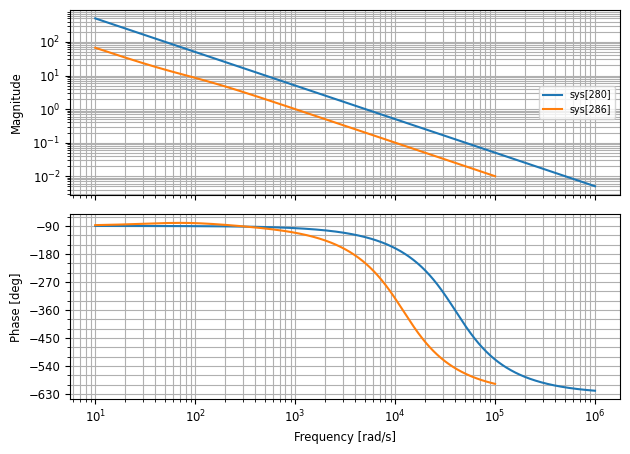

In [29]:
fband = 800

kp = L_q * 2 * np.pi * fband
ki = R * 2 * np.pi * fband
print(kp, ki)


def run(kp, ki, group_delay):
    G = control.tf([1],[L_q,R]) # process
    H = control.tf([kp, ki], [1, 0]) # PI controller
    H *= control.tf(*control.pade(group_delay/sampling_rate, 3)) # delay of controller

    S = G * H
    control.bode(S)
    gm, pm, wcg, wcp = control.margin(S)
    print(f'Gain maring: {gm} dB Phase margin: {pm} deg')
    print(f'Bandwidth {wcp / (2*np.pi)} Hz')
    # control.root_locus_map(G*H).plot()

run(kp, ki, 1.5)
run(0.3, 20, 5)